# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 1. Простой анализ данных.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.

In [6]:
data = pd.read_csv('train.csv', index_col=0)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [7]:
learning = data.sample(frac=0.7)
testing = pd.concat([data, learning, learning]).drop_duplicates(keep=False)

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [8]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак

def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [9]:
get_features_and_target(learning)

(             Pclass     Sex   Age  SibSp  Parch     Fare
 PassengerId                                             
 309               2    male  30.0      1      0  24.0000
 630               3    male   NaN      0      0   7.7333
 589               3    male  22.0      0      0   8.0500
 793               3  female   NaN      8      2  69.5500
 339               3    male  45.0      0      0   8.0500
 ...             ...     ...   ...    ...    ...      ...
 104               3    male  33.0      0      0   8.6542
 723               2    male  34.0      0      0  13.0000
 411               3    male   NaN      0      0   7.8958
 140               1    male  24.0      0      0  79.2000
 790               1    male  46.0      0      0  79.2000
 
 [624 rows x 6 columns],
 PassengerId
 309    0
 630    0
 589    0
 793    0
 339    1
       ..
 104    0
 723    0
 411    0
 140    0
 790    0
 Name: Survived, Length: 624, dtype: int64)

In [10]:
get_features_and_target(testing)

(             Pclass     Sex   Age  SibSp  Parch     Fare
 PassengerId                                             
 2                 1  female  38.0      1      0  71.2833
 3                 3  female  26.0      0      0   7.9250
 5                 3    male  35.0      0      0   8.0500
 7                 1    male  54.0      0      0  51.8625
 8                 3    male   2.0      3      1  21.0750
 ...             ...     ...   ...    ...    ...      ...
 882               3    male  33.0      0      0   7.8958
 885               3    male  25.0      0      0   7.0500
 888               1  female  19.0      0      0  30.0000
 889               3  female   NaN      1      2  23.4500
 890               1    male  26.0      0      0  30.0000
 
 [267 rows x 6 columns],
 PassengerId
 2      1
 3      1
 5      0
 7      0
 8      0
       ..
 882    0
 885    0
 888    1
 889    0
 890    1
 Name: Survived, Length: 267, dtype: int64)

#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно. 

*Не забывайте про информативность и эстетичность графиков.*

/tmp/ipykernel_61854/3441531772.py:20: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data=data, x=feature, hue=target_column, kde=False, multiple="dodge",fill=True, ax=axes[row][col], palette=colors)
/tmp/ipykernel_61854/3441531772.py:20: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data=data, x=feature, hue=target_column, kde=False, multiple="dodge",fill=True, ax=axes[row][col], palette=colors)
/tmp/ipykernel_61854/3441531772.py:22: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data=data, x=feature, hue=target_column, kde=True, multiple="dodge", ax=axes[row][col], palette=colors)
/tmp/ipykernel_61854/3441531772.py:20: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data=data, x=feature, hue=target_column, kde=False, multiple="dodge",f

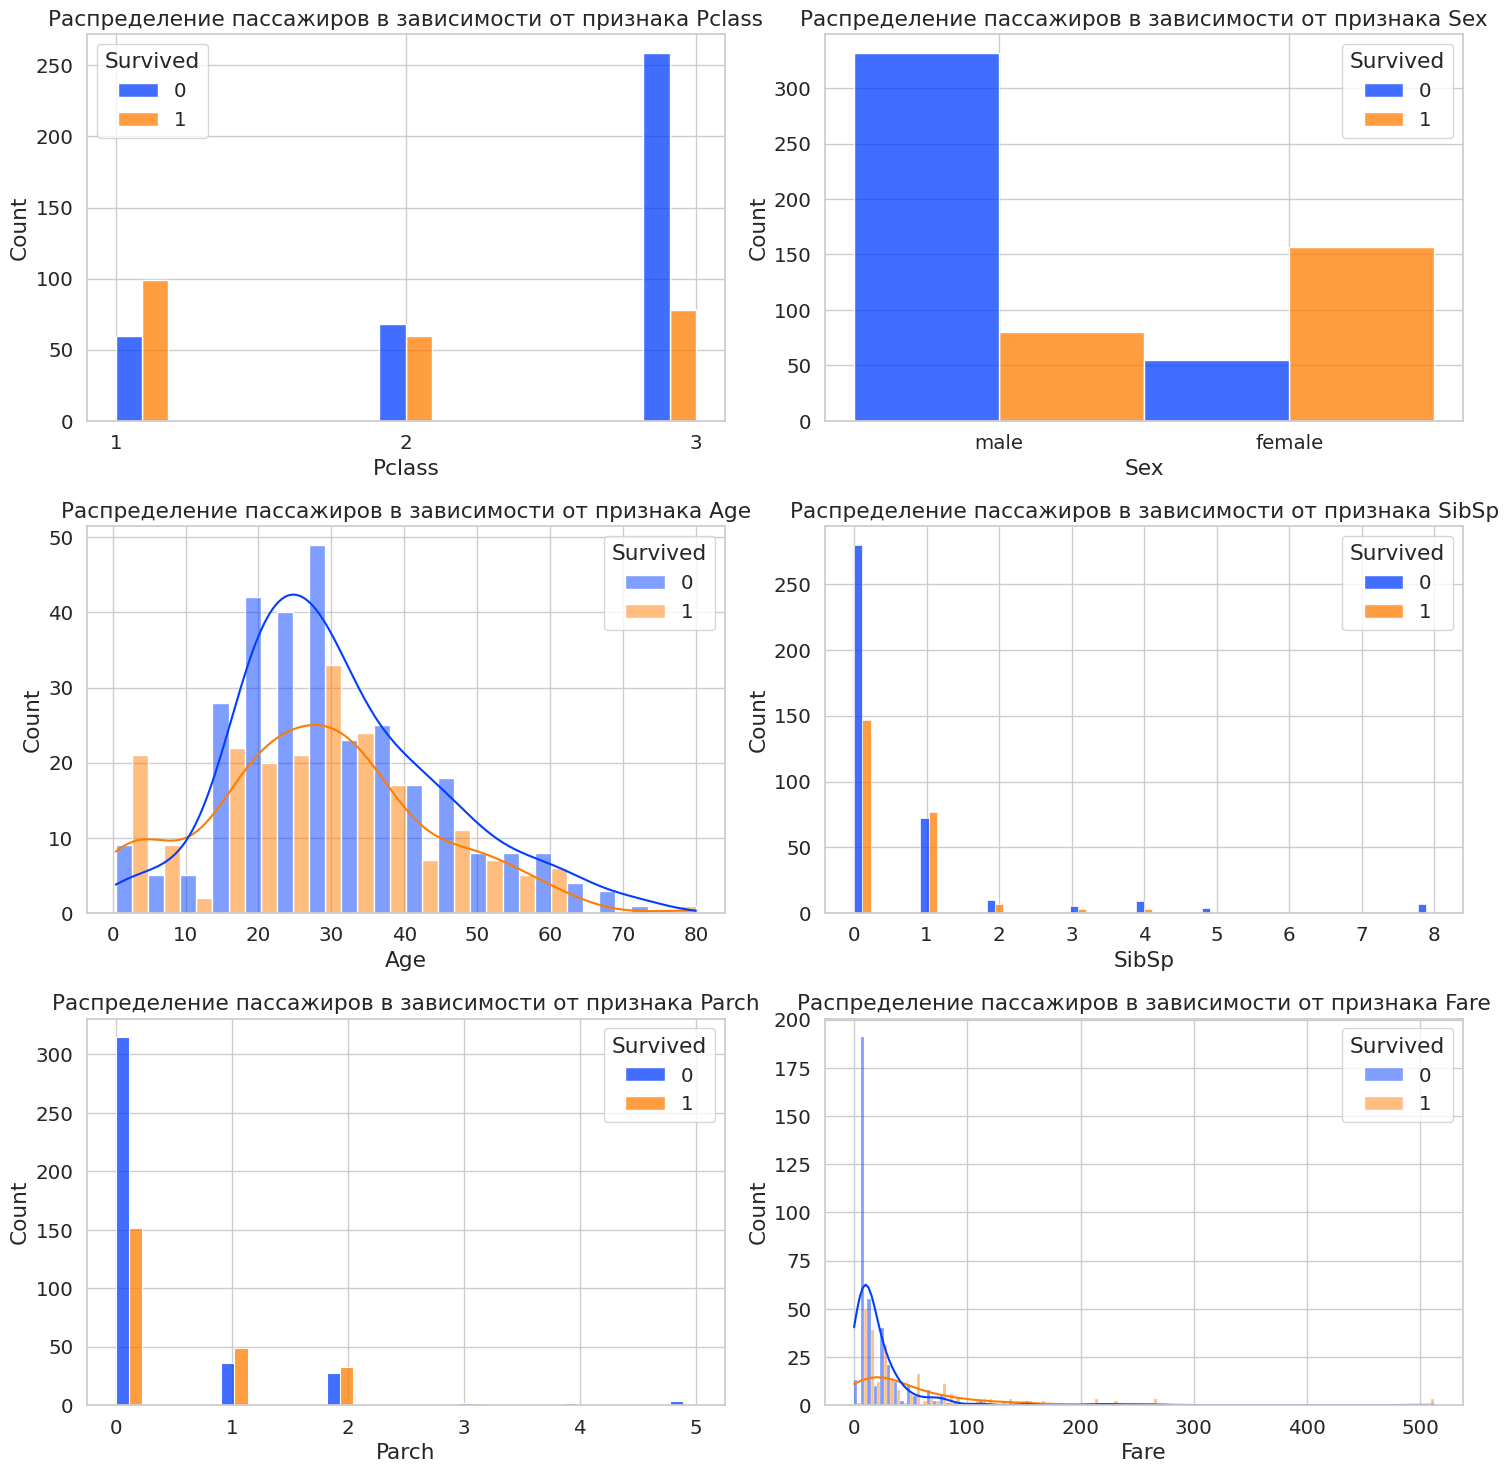

In [20]:
data = learning[features_columns + [target_column]]

# Количество строк и столбцов для подграфиков
num_plots = len(features_columns)
num_rows = (num_plots + 1) // 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

colors = sns.color_palette("bright")

# Гистограммы для каждого признака
for i, feature in enumerate(features_columns):
    row = i // num_cols
    col = i % num_cols
    
    if feature in ['Pclass', 'Sex', 'SibSp', 'Parch']:
        if feature == 'Pclass':
            axes[row][col].set_xticks([1, 2, 3])
        sns.histplot(data=data, x=feature, hue=target_column, kde=False, multiple="dodge",fill=True, ax=axes[row][col], palette=colors)
    else:
        sns.histplot(data=data, x=feature, hue=target_column, kde=True, multiple="dodge", ax=axes[row][col], palette=colors)
    
    axes[row][col].set_title(f'Распределение пассажиров в зависимости от признака {feature}')

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

Видно, что значения для признаков SibSp, Parch, Fare можно отфильтровать, так как в них встречаются единичные отклонения, которые можно считать по сути за выбросы. Сделаем это:

/tmp/ipykernel_61854/1306095661.py:21: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data=filtered_data, x=feature, hue=target_column, kde=kde, multiple="dodge", fill=True, ax=axes[row][col], palette=colors)
/tmp/ipykernel_61854/1306095661.py:21: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data=filtered_data, x=feature, hue=target_column, kde=kde, multiple="dodge", fill=True, ax=axes[row][col], palette=colors)
/tmp/ipykernel_61854/1306095661.py:21: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data=filtered_data, x=feature, hue=target_column, kde=kde, multiple="dodge", fill=True, ax=axes[row][col], palette=colors)


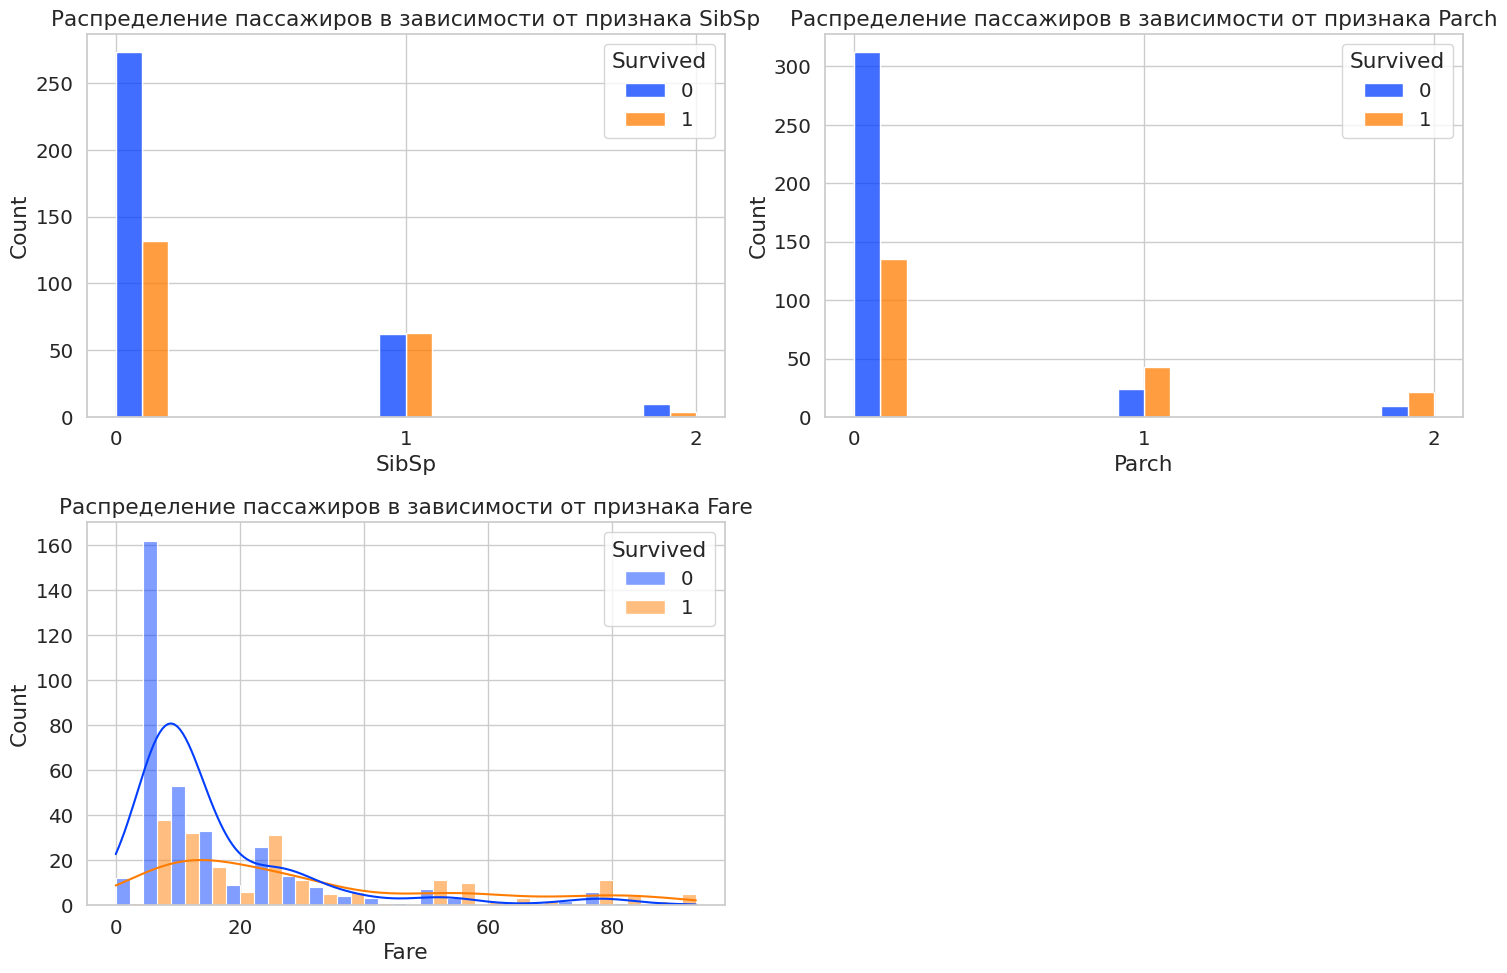

In [22]:
filtered_data = learning[(learning['SibSp'] < 3) & (learning['Parch'] <= 2) & (learning['Fare'] <= 100)]

new_features_columns = ['SibSp', 'Parch', 'Fare']

# Количество строк и столбцов для подграфиков
num_plots = len(new_features_columns)
num_rows = (num_plots + 1) // 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

colors = sns.color_palette("bright")

# Гистограммы для каждого признака
for i, feature in enumerate(new_features_columns):
    row = i // num_cols
    col = i % num_cols
    kde = True if feature == 'Fare' else False
    if feature in ['SibSp', 'Parch']:
        axes[row][col].set_xticks([0, 1, 2])
    sns.histplot(data=filtered_data, x=feature, hue=target_column, kde=kde, multiple="dodge", fill=True, ax=axes[row][col], palette=colors)
    axes[row][col].set_title(f'Распределение пассажиров в зависимости от признака {feature}')

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


Из полученных графиков можем сделать следующие выводы:
1. Шанс выжить у пассажиров 3 класса очень мал. В 1 классе, наборот, выжило больше пассажиров, чем погибло. 
2. Шанс выжить у мужчин намного меньше, чем у женщин.
3. По возрасту наибольшая доля выживших приходится на детей. Видимо, их спасали в первую очередь.
4. Среди выживших в основном были пассажиры без братьев, сестер, родителей, детей и супругов.
5. Среди погибших большинство составляли люди с недорогими тарифами.  

#### 3. Классификация методом ближайшего соседа

Ранее в контесте вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи. 

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

In [71]:
def knn(features, learning_features, learning_target, k=1):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    на основе обучающего набора данных learning_features, learning_target.
    Возвращает pandas.Series с теми же индексами, что и у features.
    Число k -- количество соседей.
    '''
    A = np.array(learning_features)
    B = np.array(features)
    values = np.argsort(((B[:, np.newaxis, :] - A[np.newaxis, :, :])**2).sum(axis=2), axis=1)[:, :k]
    C = np.ravel(np.array(learning_target))[values]
    predicted = pd.Series(list(map(lambda x: np.argmax(np.bincount(x)), C)), index=features.index)
    return predicted

Постройте классификатор методом ближайшего соседа, используя только признаки `Age` и `Fare`. 

Какую метрику (функцию расстояния) вы при этом используете? Нужно ли предварительно что-то сделать с признаками?

Как меняется результат классификации при другом количестве соседей? Рассмотрите хотя бы три различных нечетных значения количества соседей.

В качестве метрики будем использовать обычную Евклидову метрику. Для ее использования предварительно делать что-либо с признаками не нужно. 

Можно было предположить, что для нашей задачи больше подошла евклидова метрика с весами. Давайте наглядно посмотрим.

Для начала посмотрим, какую точность дает выбранная нами метрика.

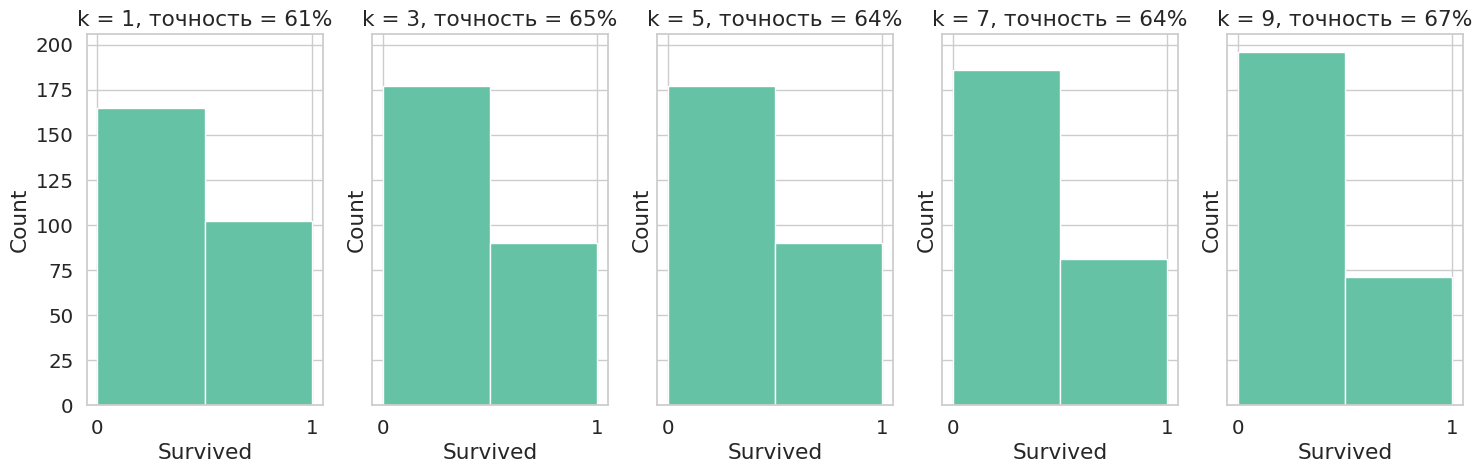

In [77]:
k_values = [1, 3, 5, 7, 9]

predicted_values = {}

for k in k_values:
    predicted_values[k] = knn(testing[['Age', 'Fare']], learning[['Age', 'Fare']], learning[['Survived']], k)

fig, axes = plt.subplots(1, len(k_values), figsize=(15, 5), sharey=True)

for i, k in enumerate(k_values):
    ax = axes[i]
    ax.hist(predicted_values[k], bins=len(np.unique(predicted_values[k])))

    # Посчитаем процент совпадения
    correct_predictions = np.sum(predicted_values[k] == testing[target_column]) 
    acc = int(correct_predictions / len(testing) * 100)
    ax.set_xticks([0, 1])
    ax.set_title(f'k = {k}, точность = {acc}%')
    ax.set_xlabel('Survived')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

Теперь посмотрим на евклидову метрику с весами. В качестве весов для наших признаков возьмем средний разброс из графиков: 40 лет для возраста, 10 долларов для тарифа.

In [73]:
def find_nearest_points(A: np.ndarray, B: np.ndarray, k: int) -> np.ndarray:    # функция из контеста
    return np.argsort(((B[:, np.newaxis, :] - A[np.newaxis, :, :])**2).sum(axis=2), axis=1)[:, :k]

def knn_weight(features, learning_features, learning_target, k=1):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    на основе обучающего набора данных learning_features, learning_target.
    Возвращает pandas.Series с теми же индексами, что и у features.
    Число k -- количество соседей.
    '''

    weight = np.array([10, 40])
    values = find_nearest_points(np.array(learning_features) * weight, np.array(features) * weight, k)
    C = np.ravel(np.array(learning_target))[values]
    predicted = pd.Series(list(map(lambda x: np.argmax(np.bincount(x)), C)), index=features.index)
    return predicted

Посмотрим, какую точность она даст.

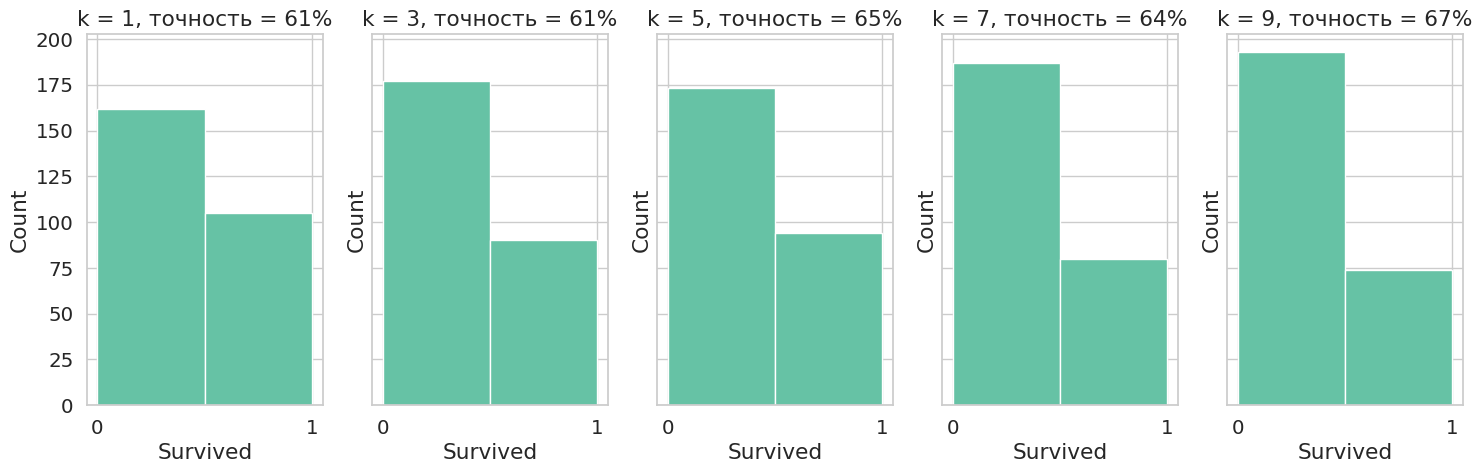

In [78]:
k_values = [1, 3, 5, 7, 9]

predicted_values = {}

for k in k_values:
    predicted_values[k] = knn_weight(testing[['Age', 'Fare']], learning[['Age', 'Fare']], learning[['Survived']], k)

fig, axes = plt.subplots(1, len(k_values), figsize=(15, 5), sharey=True)

for i, k in enumerate(k_values):
    ax = axes[i]
    ax.hist(predicted_values[k], bins=len(np.unique(predicted_values[k])))

    # Посчитаем процент совпадения
    correct_predictions = np.sum(predicted_values[k] == testing[target_column]) 
    acc = int(correct_predictions / len(testing) * 100)
    ax.set_xticks([0, 1])
    ax.set_title(f'k = {k}, точность = {acc}%')
    ax.set_xlabel('Survived')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

Видим, что точность нашей метрики сопоставима, а иногда и выше, чем у метрики с весами. Поэтому особого смысла использовать метрику с весами в данной задаче нет.

Можем предположить, что это связано с тем, что наши признаки по величине сопоставимы (оба находятся в примерных пределах от 20 до 80). В других же задачах использование метрики с весам могло бы быть более обоснованным.

In [62]:
knn(testing[['Age', 'Fare']], learning[['Age', 'Fare']], learning[['Survived']], 1)

PassengerId
1      0
8      0
10     0
11     1
12     0
      ..
883    0
885    0
887    0
890    1
891    0
Length: 267, dtype: int64

In [63]:
knn(testing[['Age', 'Fare']], learning[['Age', 'Fare']], learning[['Survived']], 3)

PassengerId
1      0
8      1
10     0
11     1
12     0
      ..
883    0
885    0
887    1
890    1
891    0
Length: 267, dtype: int64

In [64]:
knn(testing[['Age', 'Fare']], learning[['Age', 'Fare']], learning[['Survived']], 5)

PassengerId
1      0
8      1
10     0
11     1
12     0
      ..
883    0
885    0
887    1
890    1
891    0
Length: 267, dtype: int64

In [65]:
knn(testing[['Age', 'Fare']], learning[['Age', 'Fare']], learning[['Survived']], 7)

PassengerId
1      0
5      0
6      0
7      1
8      1
      ..
876    0
878    1
880    1
882    0
891    0
Length: 267, dtype: int64

Как можно было бы учесть другие признаки? Какие при этом могут возникнуть проблемы? 

Строить классификатор с другими признаками при этом не нужно. 


Можно было бы учитывать больше других признаков, например, возраст. Проблемы могли бы возникнуть с тем, что из-за больших размеров матриц могли бы быть проблемы с памятью и временем обработки. 

#### 4. Классификация логическими правилами

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**

будем разделять по Parch и по SibSp: если какое-то из значений 0, то выжил, иначе -- погиб

**Дерево 2:**

будем разделять по полу: если женщина, то человек выживает, если мужчина -- погибает

Реализуйте полученные деревья по шаблону

In [52]:
def tree1(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    
    predicted = pd.Series(((features['Parch']==0) | (features['SibSp']==0)).astype(int), index=features.index) 
    return predicted


In [53]:
def tree2(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    
    predicted = pd.Series((features['Sex']=='female').astype(int), index=features.index) 
    return predicted

#### 5. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

доля совпадений по целевому значению

Реализуйте данный критерий по шаблону

In [54]:
def criteria(target, predicted):
    '''
    Вычисление критерия качества для предсказания predicted, 
    если истинные значения -- target.
    Возвращает одно вещественное число.
    '''

    result = np.sum(predicted == target["Survived"]) / len(predicted)
    return result

Оцените качество построенных ранее моделей (два дерева, kNN), используя предложенный критерий.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [55]:
criteria(testing, knn(testing[['Age', 'Fare']], learning[['Age', 'Fare']], learning[['Survived']], 17))

0.7265917602996255

In [56]:
criteria(testing, tree1(testing))

0.37453183520599254

In [57]:
criteria(testing, tree2(testing))

0.7752808988764045

Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

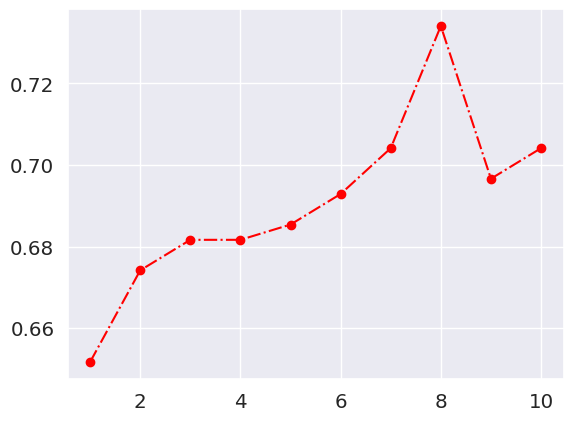

In [58]:
values = np.array([criteria(testing, knn(testing[['Age', 'Fare']], learning[['Age', 'Fare']], learning[['Survived']], k)) for k in np.arange(1, 11)])
with sns.plotting_context(font_scale=0.5), sns.axes_style("darkgrid"):
    plt.plot(np.arange(1, 11), values,marker="o",color='red', linestyle='-.')

Из графика видно, что при увеличении k растет доля совпадений по целевому значению. Это может быть связано с большим процентом смертей, поэтому чем больше k, тем больше среди "ближайших людей" будут погибших. 

#### 6. Выводы

Из анализа графиков мы получили:
1. Вероятность выжить была мала для пассажиров 3 класса и достаточно велика для пассажиров 1 класса. Это могло быть связано с тем, что каюты 3 класса располагались в невыгодном месте, откуда тяжело было бы добраться до шлюпок. Для 1 класса же, наборот, скорее всего была предусмотрена возможность быстрого доступа к ним.
2. На выживаемость сильно влиял пол человека. Большинство женщин выжило, и большинство мужчин погибло. Это могло быть связано с тем, что мужчины в первую очередь занимались спасением женщин и детей, нежели самих себя.
3. Среди выживших в основном были пассажиры без братьев, сестер, родителей, детей и супругов.


Метод ближайших соседей по двум признакам дал нам точность около 72%, что является достаточно неплохим результатом. Его точность можно повысить путем добавления других признаков для рассмотрения. Например, из графиков мы увидели, что на выживаемость сильно влиял пол пассажира, так что было бы целесообразно его учитывать.

Наши простые деревья также дали точности 37% и 77% соответственно. Из этого мы можем снова сделать вывод, что выбранный нами признак для второго дерева (пол пассажира) действительно имел сильное влияние на целевой признак. Первое же дерево дало невысокую точность. Можем предположить, что выбранные признаки не имели большого влияния на целевой. Повысить точность деревьев мы можем также с помощью добавления большего количества уровней для рассмотрения.
